In [2]:
from fastai.vision.all import *
from fastbook import *

C:\Users\jaehwi\anaconda3\envs\fastaibook\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('C:/Users/jaehwi/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/jaehwi/.fastai/data/mnist_sample/train'),Path('C:/Users/jaehwi/.fastai/data/mnist_sample/valid')]

In [5]:
(path/'train').ls()

(#2) [Path('C:/Users/jaehwi/.fastai/data/mnist_sample/train/3'),Path('C:/Users/jaehwi/.fastai/data/mnist_sample/train/7')]

In [6]:
threes = (path/'train'/'3').ls().sorted()

In [12]:
sevens = (path/'train'/'7').ls().sorted()

In [7]:
im3_path = threes[0]
im3 = Image.open(im3_path)
im3

In [13]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

In [14]:
??torch.stack

Docstring:
stack(tensors, dim=0, *, out=None) -> Tensor

Concatenates a sequence of tensors along a new dimension.

All tensors need to be of the same size.

Arguments:
    tensors (sequence of Tensors): sequence of tensors to concatenate
    dim (int): dimension to insert. Has to be between 0 and the number
        of dimensions of concatenated tensors (inclusive)

Keyword args:
    out (Tensor, optional): the output tensor.
Type:      builtin_function_or_method


In [15]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

In [16]:
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [20]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

In [21]:
a_3 = stacked_threes[1]

In [22]:
F.l1_loss(a_3.float(), mean7), \
F.mse_loss(a_3.float(), mean3).sqrt()

(tensor(0.1586), tensor(0.2021))

In [23]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [26]:
def mnist_distance(a, b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [27]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [30]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s

(tensor(0.9168), tensor(0.9854))

In [31]:
def pr_three(x, w): return (x * w).sum()

In [32]:
def f(x): return x**2
plot_function(f, 'x', 'x**2')

C:\Users\jaehwi\anaconda3\envs\fastaibook\lib\site-packages\fastbook\__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ..\aten\src\ATen\native\RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


In [33]:
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [34]:
yt.backward()

In [35]:
xt.grad

tensor(6.)

In [37]:
%matplotlib inline
# %matplotlib notebook

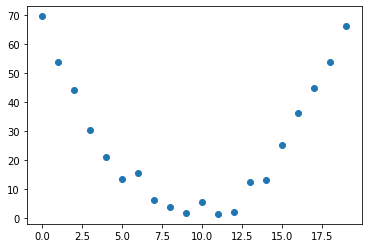

In [38]:
time = torch.arange(0,20).float(); time
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

In [39]:
def f(t, p):
    a, b, c = p
    return a*(t**2) + (b*t) + c

In [40]:
def mse(preds, tgts): return ((preds - tgts)**2).mean().sqrt()

In [42]:
params = torch.randn(3).requires_grad_()

In [43]:
preds = f(time, params)

In [46]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,300)

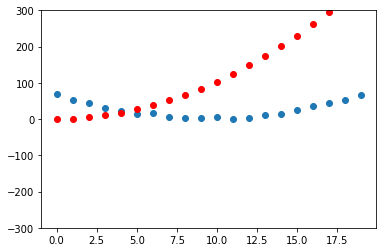

In [47]:
show_preds(preds)

In [48]:
loss = mse(preds, speed)

In [49]:
loss

tensor(150.1997, grad_fn=<SqrtBackward>)

In [50]:
loss.backward()

In [51]:
params.grad

tensor([165.3626,  10.6347,   0.6700])

In [52]:
params.grad * 1e-5

tensor([1.6536e-03, 1.0635e-04, 6.6998e-06])

In [53]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [54]:
preds = f(time, params)
mse(preds, speed)

tensor(149.9252, grad_fn=<SqrtBackward>)

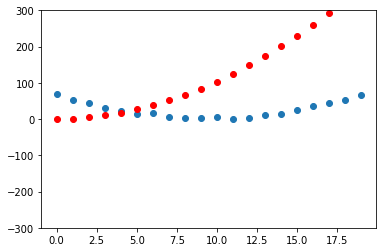

In [55]:
show_preds(preds)

In [56]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [58]:
for i in range(100): apply_step(params)

147.18101501464844
146.90676879882812
146.63255310058594
146.35836791992188
146.08421325683594
145.81008911132812
145.53599548339844
145.26193237304688
144.9879150390625
144.7139129638672
144.43994140625
144.166015625
143.89212036132812
143.61825561523438
143.34442138671875
143.07061767578125
142.79685974121094
142.5231170654297
142.24940490722656
141.9757537841797
141.7021026611328
141.42852783203125
141.1549530029297
140.8814239501953
140.60792541503906
140.33447265625
140.06105041503906
139.78765869140625
139.51431274414062
139.24099731445312
138.96771240234375
138.69447326660156
138.4212646484375
138.14808654785156
137.87496948242188
137.6018829345703
137.32882690429688
137.0557861328125
136.78280639648438
136.50985717773438
136.2369384765625
135.96408081054688
135.6912384033203
135.41844177246094
135.14572143554688
134.87298583984375
134.60032653808594
134.3276824951172
134.0550994873047
133.7825469970703
133.51002502441406
133.237548828125
132.96511840820312
132.69273376464844
13

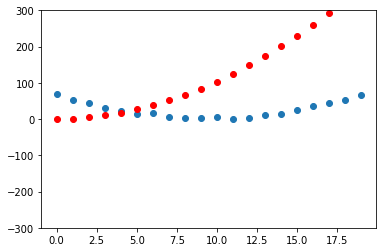

In [59]:
show_preds(preds)

In [60]:
preds = f(time, params)
mse(preds, speed)

tensor(119.9421, grad_fn=<SqrtBackward>)

In [61]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [70]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [71]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

In [72]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [73]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))

In [76]:
bias = init_params(1)

In [77]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds[:5]

tensor([[ 5.3017],
        [ 6.8557],
        [16.4948],
        [10.8333],
        [ 7.6189]], grad_fn=<SliceBackward>)

In [78]:
train_x.shape, weights.shape

(torch.Size([12396, 784]), torch.Size([784, 1]))

In [81]:
corrects = (preds>0.5).float() == train_y
corrects.float().mean()

tensor(0.5449)

In [85]:
def mnist_loss(preds, tgts):
    preds = torch.sigmoid(preds)
    return torch.where(tgts==1, 1-preds, preds).mean()

In [86]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [87]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [89]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [90]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [91]:
def batch_accuracy(xb, yb):
    preds = torch.sigmoid(xb)
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [92]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [93]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6713

In [94]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8579 0.9208 0.9418 0.9511 0.956 0.9584 0.9609 0.9638 0.9628 0.9633 0.9662 0.9682 0.9697 0.9712 0.9721 0.9731 0.9731 0.9731 0.9736 0.9746 

In [95]:
linear_model = nn.Linear(28*28, 1)

In [96]:
w, b = linear_model.parameters()

In [97]:
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [98]:
class BasicOptim:
    def __init__(self,params,lr): 
        self.params, self.lr = list(params), lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [99]:
opt = BasicOptim(linear_model.parameters(), lr)

In [100]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [101]:
validate_epoch(linear_model)

0.5486

In [102]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model))

In [103]:
train_model(linear_model, 20)

0.4932
0.8081
0.8472
0.9131
0.9351
0.9478
0.956
0.9629
0.9658
0.9678
0.9692
0.9721
0.9741
0.9751
0.9761
0.977
0.9775
0.978
0.978
0.979


In [104]:
opt = SGD(linear_model.parameters(), lr)

In [105]:
train_model(linear_model, 20)

0.979
0.979
0.9795
0.979
0.9795
0.9795
0.98
0.9804
0.9809
0.9814
0.9819
0.9814
0.9809
0.9809
0.9809
0.9814
0.9814
0.9814
0.9814
0.9814


In [106]:
dls = DataLoaders(dl, valid_dl)

In [107]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [111]:
learn.fit(10, lr=1e-1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.120908,0.319826,0.660451,00:00
1,0.088602,0.153263,0.902846,00:00
2,0.069868,0.097648,0.943081,00:00
3,0.059022,0.075619,0.959764,00:00
4,0.052239,0.064238,0.963690,00:00
5,0.047667,0.057322,0.965653,00:00
6,0.044372,0.052658,0.967615,00:00
7,0.041860,0.049281,0.968597,00:00
8,0.039859,0.046708,0.968106,00:00
9,0.038211,0.044671,0.967615,00:00


In [112]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [113]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [114]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.336900,0.414965,0.504416,00:00
1,0.156738,0.240559,0.792934,00:00
2,0.086059,0.119861,0.912659,00:00
3,0.056033,0.080412,0.939156,00:00
4,0.042163,0.062488,0.953386,00:00
5,0.035104,0.052360,0.964181,00:00
6,0.031062,0.045958,0.965653,00:00
7,0.028444,0.041591,0.967125,00:00
8,0.026558,0.038437,0.968597,00:00
9,0.025100,0.036039,0.970069,00:00


In [115]:
torch.cuda.is_available()

True

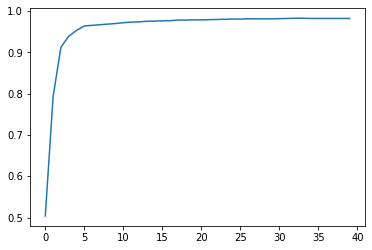

In [116]:
plt.plot(L(learn.recorder.values).itemgot(2))